<a href="https://colab.research.google.com/github/KiranGangoor0301/Most_Streamed_Spotify_Songs_2023/blob/main/most_streamed_spotify_songs_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [113]:
df = pd.read_csv("spotify-2023.csv", encoding='latin1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [114]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [115]:
df.shape

(953, 24)

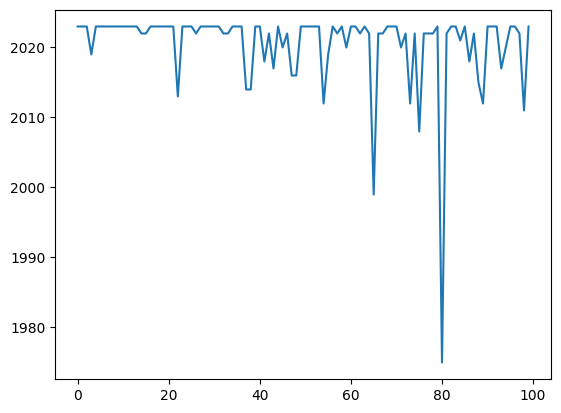

In [116]:
sample = df.head(100)
plt.plot(sample.index, sample['released_year'])

# 2. Data processing

In [117]:
df.rename(columns={'artist(s)_name':"artists_name"}, inplace=True)
df.rename(columns={'key':"song_key"}, inplace=True)
df.head()

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,song_key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [118]:
df.duplicated().any()

False

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists_name          953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  song_key              858 non-null    ob

In [120]:
df.isna().sum()

track_name               0
artists_name             0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
song_key                95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [121]:
df = df.drop('in_shazam_charts', axis=1)

In [122]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].apply(lambda val: str(val).replace(',',''))
df['song_key'] = df['song_key'].fillna('undefined')

In [123]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['song_key'] = df['song_key'].astype('category')
df['mode'] = df['mode'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            953 non-null    object  
 1   artists_name          953 non-null    object  
 2   artist_count          953 non-null    int64   
 3   released_year         953 non-null    int64   
 4   released_month        953 non-null    int64   
 5   released_day          953 non-null    int64   
 6   in_spotify_playlists  953 non-null    int64   
 7   in_spotify_charts     953 non-null    int64   
 8   streams               952 non-null    float64 
 9   in_apple_playlists    953 non-null    int64   
 10  in_apple_charts       953 non-null    int64   
 11  in_deezer_playlists   953 non-null    int64   
 12  in_deezer_charts      953 non-null    int64   
 13  bpm                   953 non-null    int64   
 14  song_key              953 non-null    category
 15  mode  

In [124]:
df = df.dropna()

In [125]:
df.isna().sum()

track_name              0
artists_name            0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
song_key                0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# 3. Anomaly detection and processing

Checking the artists_count column

<Axes: >

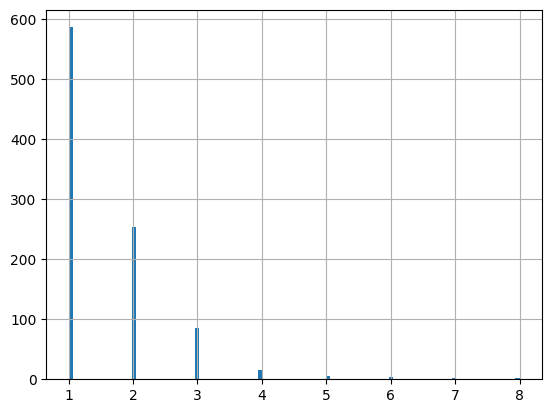

In [126]:
df['artist_count'].hist(bins=100)

<Axes: >

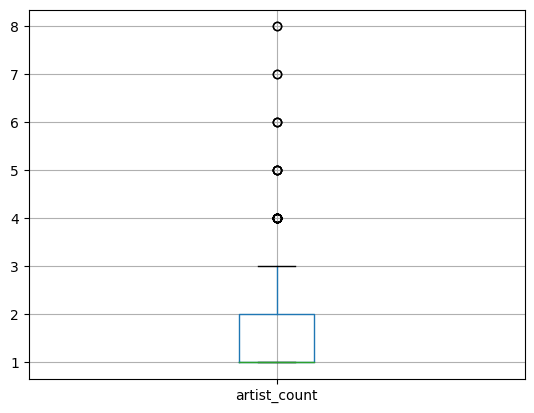

In [127]:
df.boxplot(column=['artist_count'])

In [128]:
df['artist_count'].describe()

count    952.000000
mean       1.556723
std        0.893331
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

Check the released_year column

<Axes: >

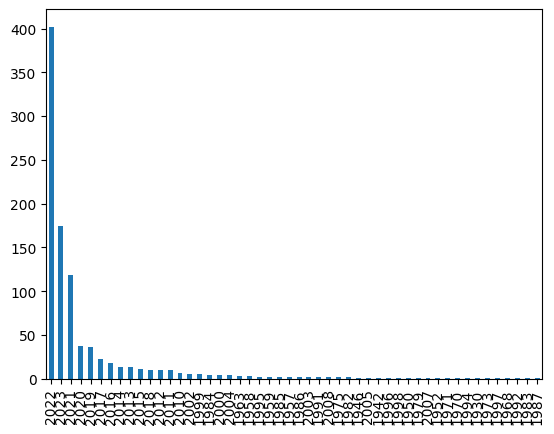

In [129]:
df['released_year'].value_counts().plot.bar()

Checking the in_spotify_charts column

In [130]:
df['in_spotify_charts'].value_counts()

0      404
4       48
2       42
6       36
3       18
      ... 
76       1
58       1
79       1
66       1
147      1
Name: in_spotify_charts, Length: 82, dtype: int64

Checking the song_key column

In [131]:
df['song_key'].value_counts()

C#           120
G             96
undefined     95
G#            91
F             89
B             81
D             81
A             74
F#            73
E             62
A#            57
D#            33
Name: song_key, dtype: int64

In [132]:
df['song_key'].describe()

count     952
unique     12
top        C#
freq      120
Name: song_key, dtype: object

<Axes: >

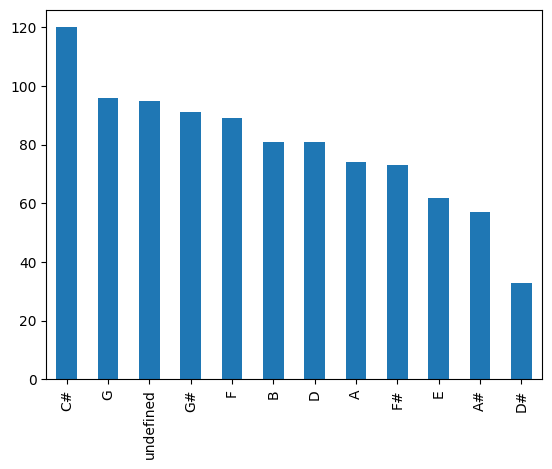

In [133]:
df['song_key'].value_counts().plot.bar()

Checking the danceability_% column

In [134]:
df['danceability_%'].describe()

count    952.000000
mean      66.984244
std       14.631282
min       23.000000
25%       57.000000
50%       69.000000
75%       78.000000
max       96.000000
Name: danceability_%, dtype: float64

<Axes: >

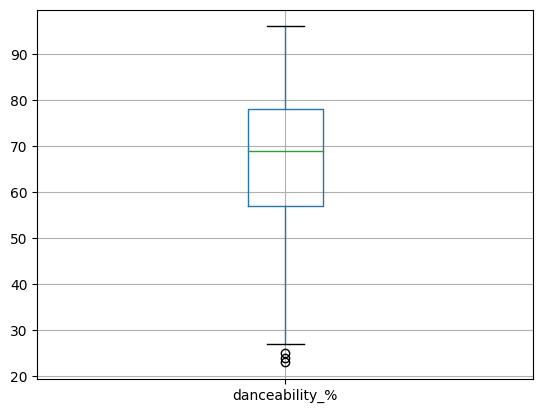

In [135]:
df.boxplot(column=['danceability_%'])

# 4. Data visualization


Text(0, 0.5, 'Name')

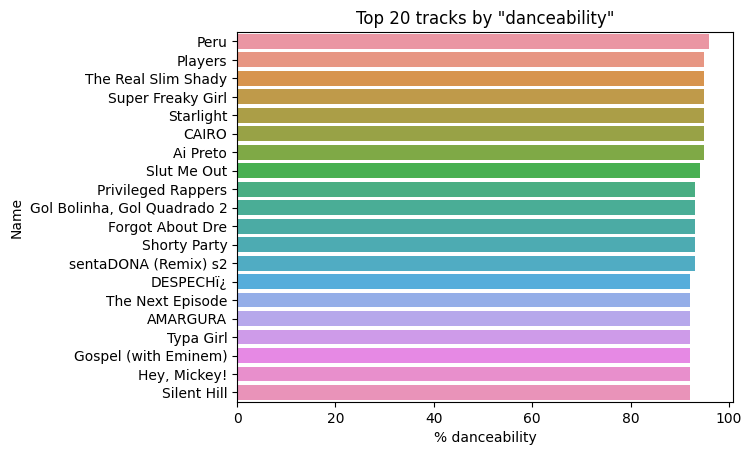

In [136]:
# 20 most danceable tracks
df_danceability_20 = df.sort_values(by='danceability_%', ascending=False).head(20)

plt.figure()

sns.barplot(x = 'danceability_%', y = 'track_name', data = df_danceability_20)
plt.title('Top 20 tracks by "danceability"')
plt.xlabel('% danceability')
plt.ylabel('Name')

Text(0, 0.5, 'Name')

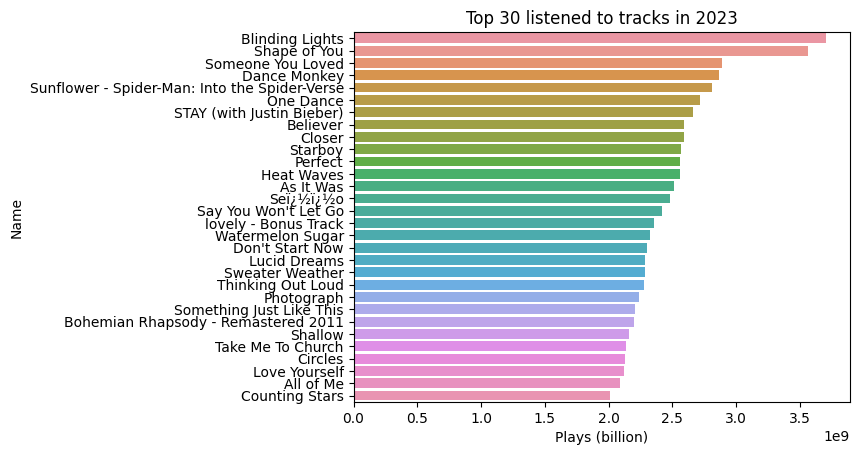

In [137]:
# 30 based on auditions
df_streaming = df.sort_values(by='streams', ascending=False).head(30)

plt.figure()

sns.barplot(x = 'streams', y = 'track_name', data = df_streaming)
plt.title('Top 30 listened to tracks in 2023')
plt.xlabel('Plays (billion)')
plt.ylabel('Name')

Text(0, 0.5, 'Number of releases')

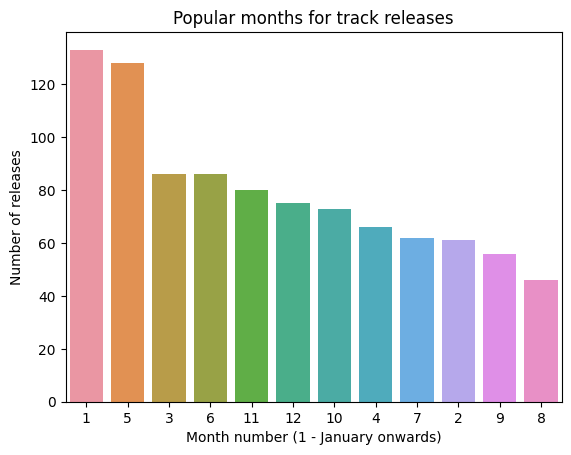

In [138]:
# Track releases by month

plt.figure()
sns.countplot(x = 'released_month', data = df, order=df['released_month'].value_counts().index)
plt.title('Popular months for track releases')
plt.xlabel('Month number (1 - January onwards)')
plt.ylabel('Number of releases')

Text(0, 0.5, 'Danceability')

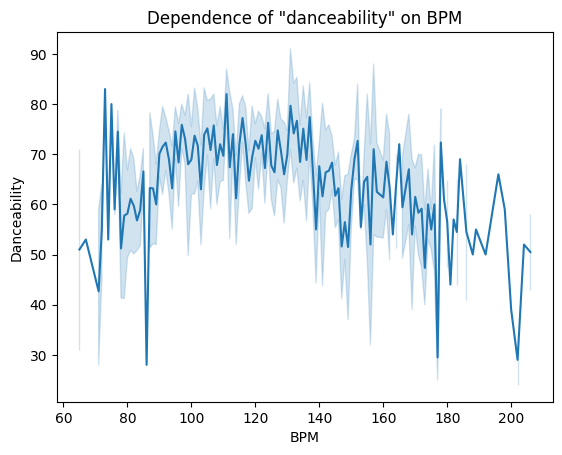

In [139]:
# Danceability depends on BPM
df_bpm_sorted = df.sort_values(by='bpm', ascending=False)

plt.figure()

sns.lineplot(x = 'bpm', y = 'danceability_%', data = df_bpm_sorted)
plt.title('Dependence of "danceability" on BPM')
plt.xlabel('BPM')
plt.ylabel('Danceability')

Text(0, 0.5, 'Average number of plays')

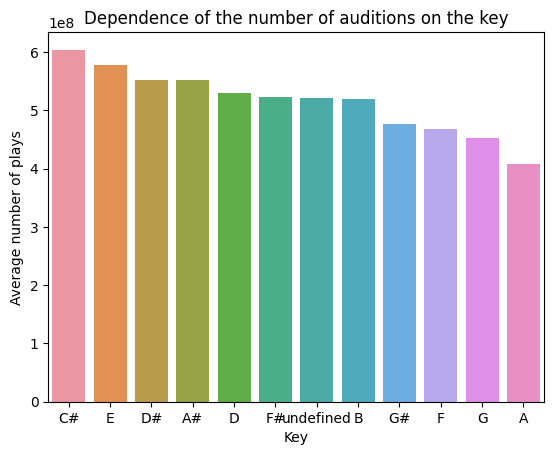

In [140]:
# depends on the number of auditions on the tone
df_grouped = df.groupby(['song_key']).agg({'streams':[np.mean]})
df_grouped = df_grouped.reset_index()
df_grouped.columns = ['song_key', 'streams_mean']

plt.figure()

sns.barplot(x = 'song_key', y = 'streams_mean', data = df_grouped,
            order=df_grouped.sort_values('streams_mean', ascending=False)['song_key'])
plt.title('Dependence of the number of auditions on the key')
plt.xlabel('Key')
plt.ylabel('Average number of plays')

<Figure size 640x480 with 0 Axes>

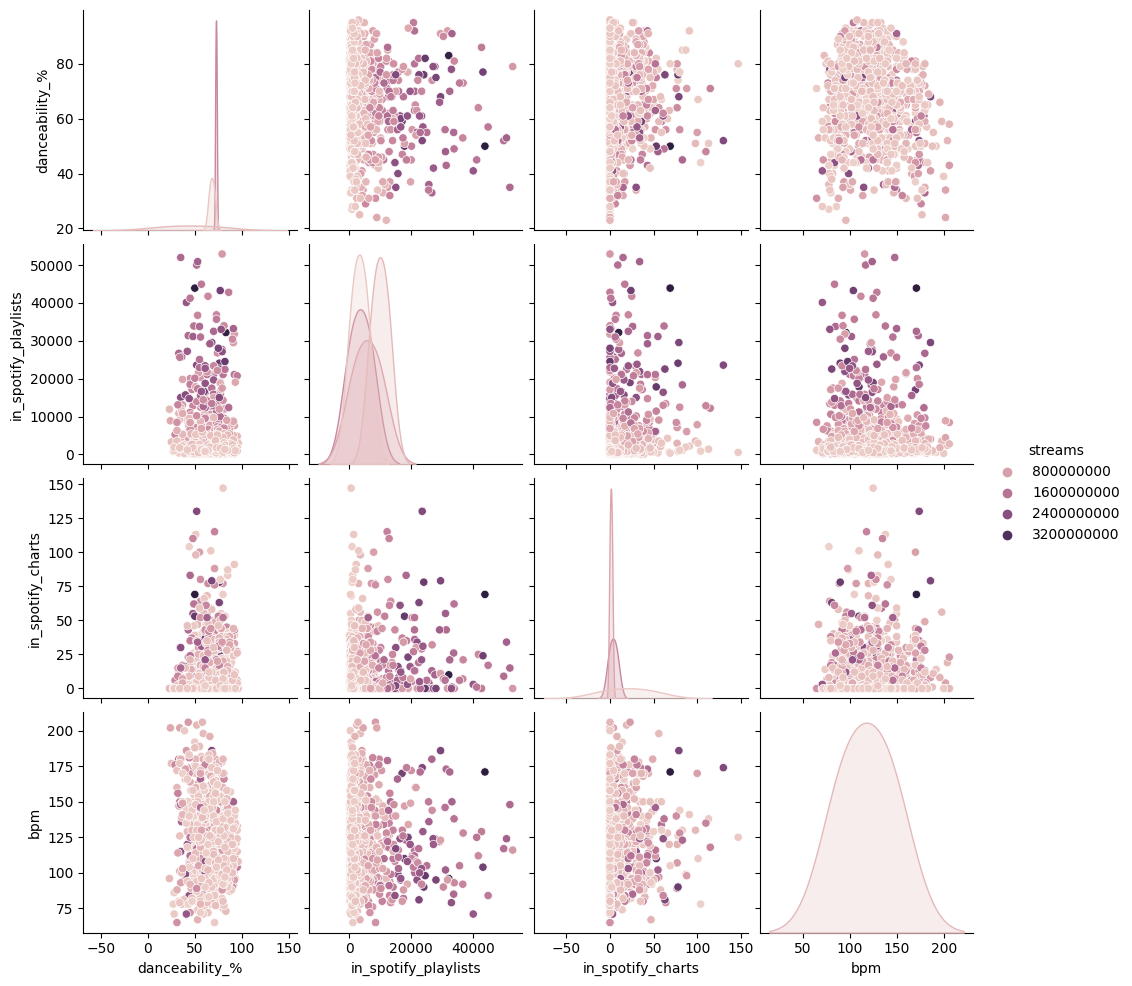

In [141]:
# number of plays by track parameters

df_pair_params = df.loc[:,['danceability_%', 'in_spotify_playlists','in_spotify_charts', 'bpm', 'streams']]

plt.figure()
sns.pairplot(data=df_pair_params, hue='streams')

# **LR 6**

# Classification

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np

In [143]:
df['hit_track'] = np.nan

conditions = [
    (df['in_spotify_playlists'] > 25000),
    (df['in_spotify_playlists'] > 10000) & (df['in_spotify_playlists'] <= 25000),
    (df['in_spotify_playlists'] > 1000)  & (df['in_spotify_playlists'] <= 10000),
    (df['in_spotify_playlists'] >= 0)    | (df['in_spotify_playlists'] <= 1000)
             ]
values = ['100%', '66%', '33%', '0%']
df['hit_track'] = np.select(conditions, values)
df['hit_track'] = df['hit_track'].astype('category')

In [144]:
df[['track_name','in_spotify_playlists', 'hit_track']].sample(10)

,track_name,in_spotify_playlists,hit_track
327,Peaches (from The Super Mario Bros. Movie),34,0%
694,NEW MAGIC WAND,4708,33%
140,Believer,18986,66%
194,Shut up My Moms Calling,1788,33%
338,Private Landing (feat. Justin Bieber & Future),1190,33%
606,Pope Is a Rockstar,1966,33%
858,Boyfriends,1517,33%
657,Lost,29499,100%
347,Man Made A Bar (feat. Eric Church),329,0%
496,Jingle Bells - Remastered 1999,4326,33%


In [145]:
X = df[['in_spotify_playlists', 'released_year', 'in_apple_playlists', 'in_deezer_playlists']]
Y = df['hit_track']


In [146]:
X.sample(5)

,in_spotify_playlists,released_year,in_apple_playlists,in_deezer_playlists
47,2483,2016,68,24
495,8612,1958,120,52
455,1007,2022,5,1
248,214,2023,3,6
106,21097,2017,384,1034


In [147]:
Y.sample(5)

474     0%
72     33%
836    33%
905    33%
416    33%
Name: hit_track, dtype: category
Categories (4, object): ['0%', '100%', '33%', '66%']

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=152)

In [149]:
print(X_train)

     in_spotify_playlists  released_year  in_apple_playlists  \
537                  4635           2021                  50   
607                  2226           2021                  29   
58                    525           2023                  34   
127                 21915           2019                 437   
696                  4890           2020                  52   
..                    ...            ...                 ...   
828                  4449           2022                  80   
501                  4440           2022                  81   
395                 17852           2015                  69   
199                 44927           1984                  34   
733                  2092           2022                  75   

     in_deezer_playlists  
537                   30  
607                   44  
58                    39  
127                 1212  
696                  100  
..                   ...  
828                   66  
501            

In [150]:
print(X_test)

     in_spotify_playlists  released_year  in_apple_playlists  \
208                   332           2023                  18   
301                   654           2023                  11   
448                  6512           1959                  88   
100                  8448           2012                 160   
203                   995           2022                  12   
..                    ...            ...                 ...   
9                    2953           2023                  49   
285                   875           2023                  17   
780                  2291           2022                   9   
564                  5073           2021                  83   
727                 42798           2011                 217   

     in_deezer_playlists  
208                    5  
301                   18  
448                  277  
100                  163  
203                    9  
..                   ...  
9                     66  
285            

In [151]:
dtree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [152]:
dtree_model.fit(X_train, Y_train)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [153]:
dtree_pred = dtree_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [154]:
print(accuracy_score(dtree_pred, Y_test))
print(accuracy_score(knn_pred, Y_test))

0.9947643979057592
0.9895287958115183


In [155]:
print('Decision tree')
print(classification_report(dtree_pred, Y_test))

print('k-means')
print(classification_report(knn_pred, Y_test))

Decision tree
              precision    recall  f1-score   support

          0%       1.00      1.00      1.00        57
        100%       0.90      1.00      0.95         9
         33%       1.00      1.00      1.00       107
         66%       1.00      0.94      0.97        18

    accuracy                           0.99       191
   macro avg       0.97      0.99      0.98       191
weighted avg       1.00      0.99      0.99       191

k-means
              precision    recall  f1-score   support

          0%       0.96      1.00      0.98        55
        100%       1.00      1.00      1.00        10
         33%       1.00      0.98      0.99       109
         66%       1.00      1.00      1.00        17

    accuracy                           0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



# Clustering

In [156]:
from sklearn.cluster import KMeans
from sklearn.cluster import Birch

In [157]:
X = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
Y = df['hit_track']

Text(0.5, 0, 'Deezer')

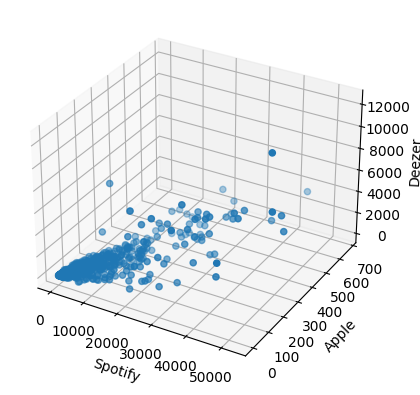

In [158]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists'])
ax.set_xlabel('Spotify')
ax.set_ylabel('Apple')
ax.set_zlabel('Deezer')

In [159]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [160]:
print(kmeans.cluster_centers_)

[[ 3040.70881671    51.75986079   119.87703016]
 [25908.34444444   222.13333333  2929.95555556]]


In [161]:
def show_clusters(series, labels, centers, axes_labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')

    ax.scatter(*series, c = labels, cmap = 'rainbow')
    if centers:
        ax.scatter(*centers, color='black')

    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.set_zlabel(axes_labels[2])

In [162]:
def clusters_count(labels):
    return len(set(labels))

2


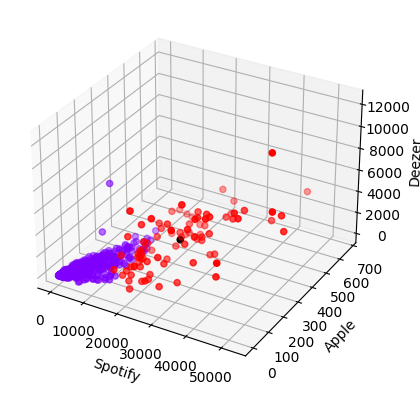

In [163]:
show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


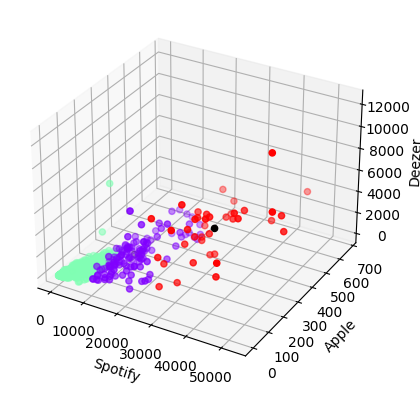

In [164]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


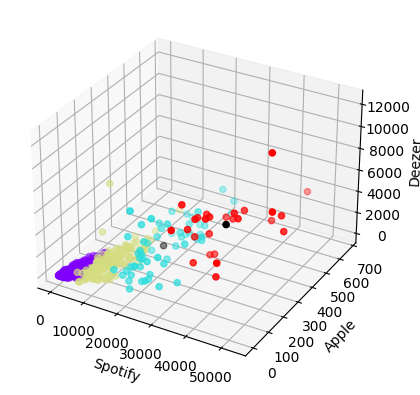

In [165]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=kmeans.labels_,
             centers=[kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2]],
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(kmeans.labels_))

3


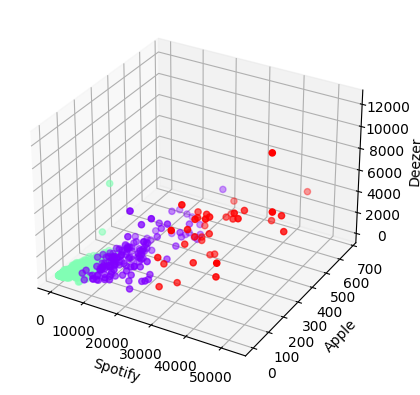

In [166]:
birch = Birch(n_clusters=3)
birch.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=birch.labels_,
             centers=None,
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(birch.labels_))

4


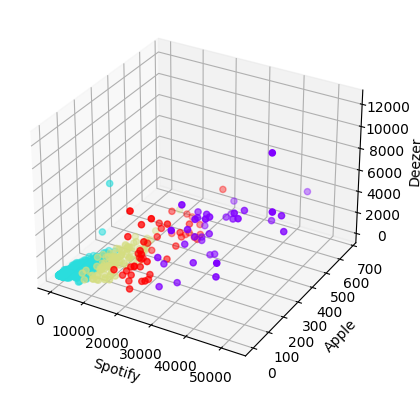

In [167]:
birch = Birch(n_clusters=4)
birch.fit(X)

show_clusters(series=[X['in_spotify_playlists'], X['in_apple_playlists'], X['in_deezer_playlists']],
             labels=birch.labels_,
             centers=None,
             axes_labels=['Spotify', 'Apple', 'Deezer'],)

print(clusters_count(birch.labels_))

# **3. Simple and multiple linear regression**

# Simple Linear Regression

In [168]:
import statsmodels.api as sm

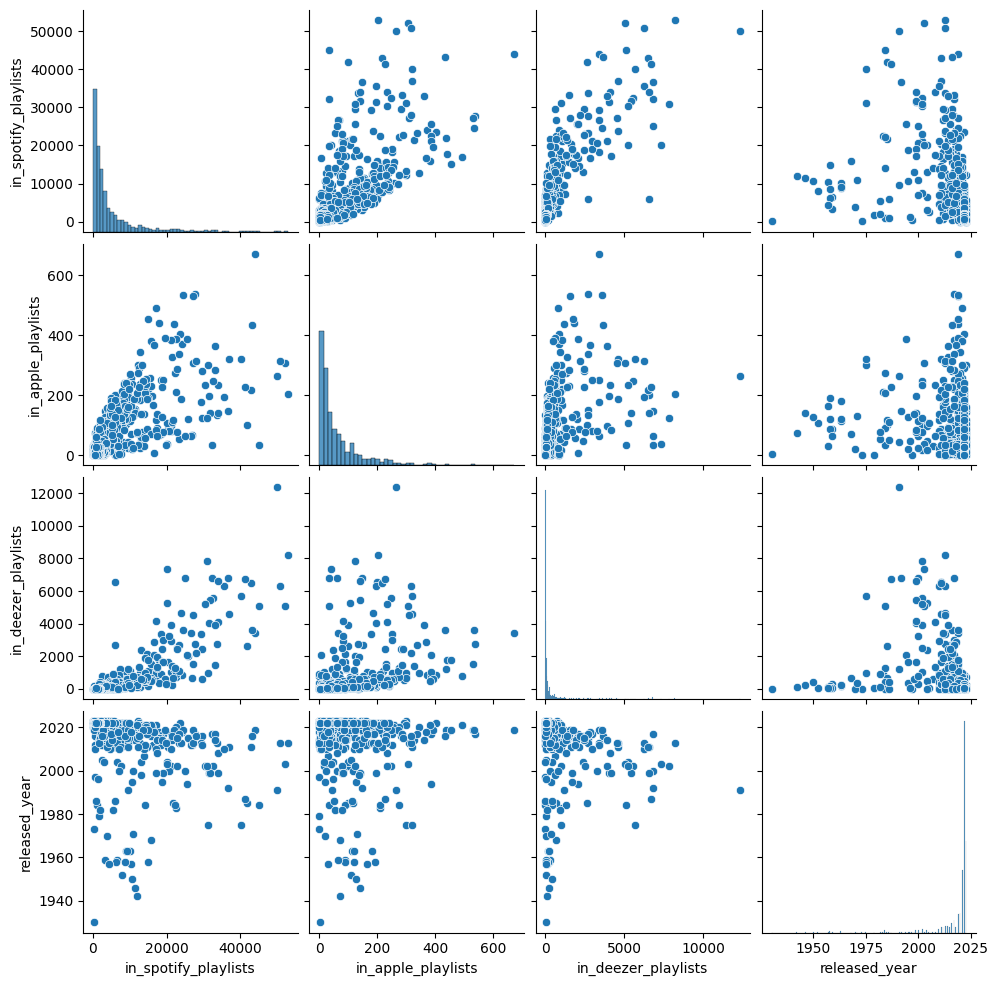

In [169]:
df_pairs = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'released_year']]
sns.pairplot(df_pairs)

Text(0, 0.5, 'Deezer')

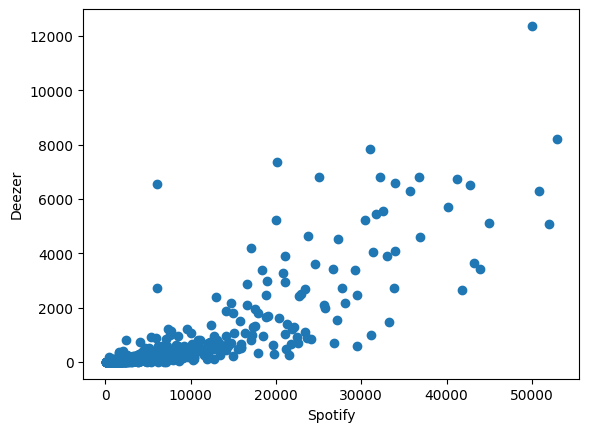

In [170]:
plt.scatter(df['in_spotify_playlists'], df['in_deezer_playlists'])
plt.xlabel('Spotify')
plt.ylabel('Deezer')

In [171]:
y = df['in_deezer_playlists']
x = df['in_spotify_playlists']
x = sm.add_constant(x)

ols_model = sm.OLS(y, x)
ols_results = ols_model.fit()

print(ols_results.summary())

                             OLS Regression Results                            
Dep. Variable:     in_deezer_playlists   R-squared:                       0.683
Model:                             OLS   Adj. R-squared:                  0.683
Method:                  Least Squares   F-statistic:                     2046.
Date:                 Sat, 18 Nov 2023   Prob (F-statistic):          3.57e-239
Time:                         10:01:07   Log-Likelihood:                -7497.0
No. Observations:                  952   AIC:                         1.500e+04
Df Residuals:                      950   BIC:                         1.501e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

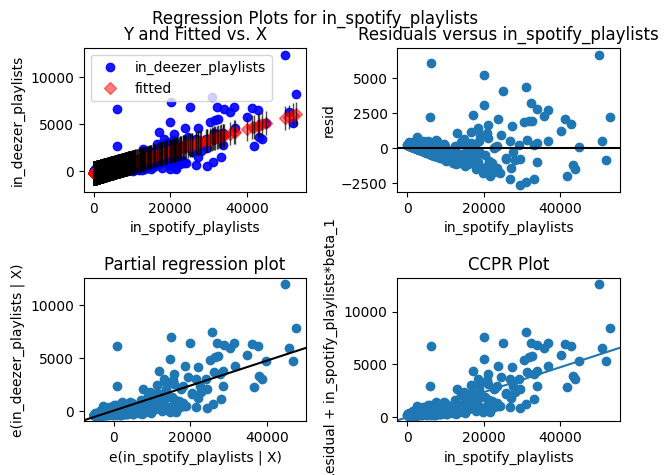

In [172]:
fig = plt.figure()
fig = sm.graphics.plot_regress_exog(ols_results, 'in_spotify_playlists', fig = fig)

# Multiple Linear Regression

In [173]:
x = df[['in_apple_playlists', 'in_deezer_playlists','streams',]]
y = df['in_spotify_playlists']

In [174]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(x, y)

print('Intercept:',lr_model.intercept_)
print('Coef:',lr_model.coef_)

Intercept: 260.90809906418144
Coef: [2.10071542e+01 3.82458324e+00 3.97064955e-06]


In [175]:
sm_x = sm.add_constant(x)

ols_model = sm.OLS(y, sm_x)
ols_results = ols_model.fit()

print(ols_results.summary())

                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.840
Model:                              OLS   Adj. R-squared:                  0.840
Method:                   Least Squares   F-statistic:                     1662.
Date:                  Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                          10:01:09   Log-Likelihood:                -9021.3
No. Observations:                   952   AIC:                         1.805e+04
Df Residuals:                       948   BIC:                         1.807e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

# **4. Forecasting using a neural network**

In [176]:
df['streams'].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

In [177]:
df['hit_track2'] = np.nan

conditions = [(df['streams'] >= 6*(10**8)), (df['streams'] < 6*(10**8))]
values = [1, 0]

df['hit_track2'] = np.select(conditions, values)
df['hit_track2'] = df['hit_track2'].astype('int16')

In [178]:
df[['track_name','streams','hit_track2']].sample(5)

,track_name,streams,hit_track2
260,Never Felt So Alone,1.177479e+08,0
290,Shut Down,4.821752e+08,0
535,drivers license,1.858144e+09,1
320,Gangsta's Paradise,1.357609e+09,1
856,SLOW DANCING IN THE DARK,1.122364e+09,1


In [179]:
X = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 'streams']]
Y = df['hit_track2']

In [180]:
X.head(5)

,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,streams
0,553,43,45,141381703.0
1,1474,48,58,133716286.0
2,1397,94,91,140003974.0
3,7858,116,125,800840817.0
4,3133,84,87,303236322.0


In [181]:
Y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: hit_track2, dtype: int16

In [182]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [183]:
X_train, X_test_validate, Y_train, Y_test_validate = train_test_split(X, Y, test_size=0.30, random_state=152)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_test_validate, Y_test_validate, test_size=0.5, random_state=152)

print(X_train.shape, Y_train.shape, X_validate.shape, Y_validate.shape, X_test.shape, Y_test.shape,)

(666, 4) (666,) (143, 4) (143,) (143, 4) (143,)


In [184]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation = 'relu', input_shape = (4,)),
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'sgd',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [185]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 1000, validation_data = (X_validate, Y_validate))

Epoch 1/1000
21/21 [==============================] - 1s 17ms/step - loss: 0.6790 - accuracy: 0.7372 - val_loss: 0.6702 - val_accuracy: 0.8182
Epoch 2/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6609 - accuracy: 0.7838 - val_loss: 0.6526 - val_accuracy: 0.7552
Epoch 3/1000
21/21 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.7492 - val_loss: 0.6352 - val_accuracy: 0.7413
Epoch 4/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.7417 - val_loss: 0.6202 - val_accuracy: 0.7343
Epoch 5/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6136 - accuracy: 0.7342 - val_loss: 0.6074 - val_accuracy: 0.7343
Epoch 6/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.7312 - val_loss: 0.5963 - val_accuracy: 0.7343
Epoch 7/1000
21/21 [==============================] - 0s 6ms/step - loss: 0.5913 - accuracy: 0.7312 - val_loss: 0.5866 - val_accuracy: 0.7343
Epoch

In [186]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9930


[0.028318064287304878, 0.9930070042610168]

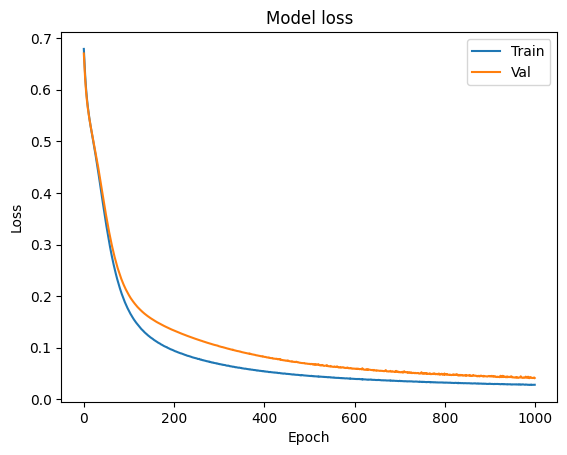

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

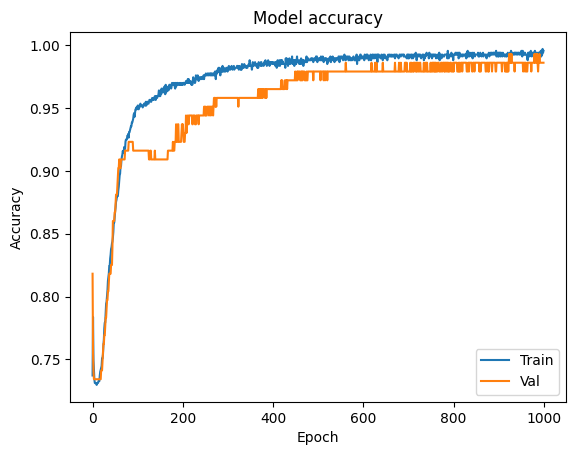

In [188]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [189]:
predictions = model.predict(X_test[:5])

1/1 [==============================] - 0s 83ms/step


In [190]:
X_test[:5]

array([[0.01870732, 0.02232143, 0.00242581, 0.05572432],
       [0.39864187, 0.12202381, 0.2382146 , 0.44316189],
       [0.14213025, 0.17410714, 0.01140131, 0.33933975],
       [0.07912308, 0.03125   , 0.00323441, 0.18495922],
       [0.09190989, 0.07738095, 0.00808604, 0.20497519]])

In [191]:
predictions

array([[2.5969127e-04],
       [1.0000000e+00],
       [9.9999857e-01],
       [8.7438774e-01],
       [9.8196310e-01]], dtype=float32)